# Data Visualisation Lab 6

### Yash Maniya (B20CS033)

In [69]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [30]:
CMAP = matplotlib.colors.ListedColormap(sns.color_palette('deep', n_colors=3).as_hex())

In [77]:
def visualize_PCA(data, target, title):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    CMAP = matplotlib.colors.ListedColormap(sns.color_palette('deep', n_colors=3).as_hex())
    cmap = [CMAP, 'viridis'][title=='Wine']

    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target, cmap=cmap ,edgecolor='k', s=70)
    plt.title(f'PCA Visualization - {title}', fontsize=18, fontweight='bold')
    plt.xlabel('PCA Component 1', fontsize=14)
    plt.ylabel('PCA Component 2', fontsize=14)

In [74]:
def visualize_tsne(data, target, dataset_name, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=42)
    tsne_result = tsne.fit_transform(data)
    CMAP = matplotlib.colors.ListedColormap(sns.color_palette('deep', n_colors=3).as_hex())
    cmap = [CMAP, 'viridis'][dataset_name=='Wine']

    if n_components == 2:
        plt.figure(figsize=(10, 8))
        plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=target, cmap=cmap, edgecolor='k', s=70)
        plt.title(f't-SNE Visualization (2D) - {dataset_name}', fontsize=18, fontweight='bold')
        plt.xlabel('t-SNE Component 1', fontsize=14)
        plt.ylabel('t-SNE Component 2', fontsize=14)
        plt.show()
    elif n_components == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=target, cmap=cmap, edgecolor='k', s=70)
        ax.set_title(f't-SNE Visualization (3D) - {dataset_name}', fontsize=18, fontweight = 'bold')
        ax.set_xlabel('t-SNE Component 1', fontsize=12)
        ax.set_ylabel('t-SNE Component 2', fontsize=12)
        ax.set_zlabel('t-SNE Component 3', fontsize=12)
        if cmap=='viridis':
            fig.colorbar(scatter, ax=ax, label='Target Class')


## **Visualizing Iris Dataset**

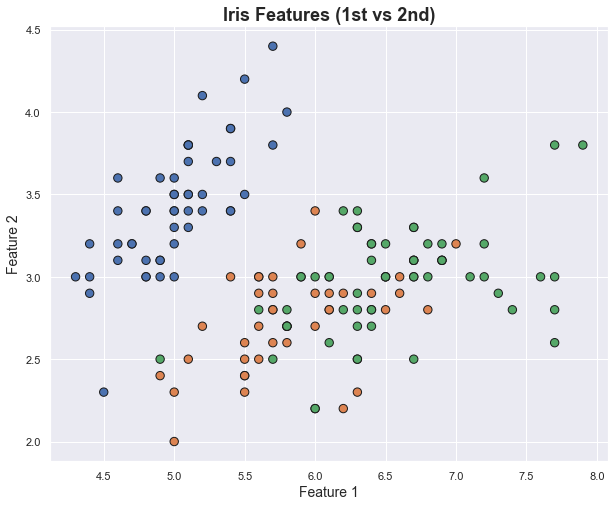

In [67]:
iris = datasets.load_iris()

plt.figure(figsize=(10, 8))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap=CMAP, edgecolor='k', s=70)
plt.title(f'Iris Features (1st vs 2nd)', fontsize=18, fontweight='bold')
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

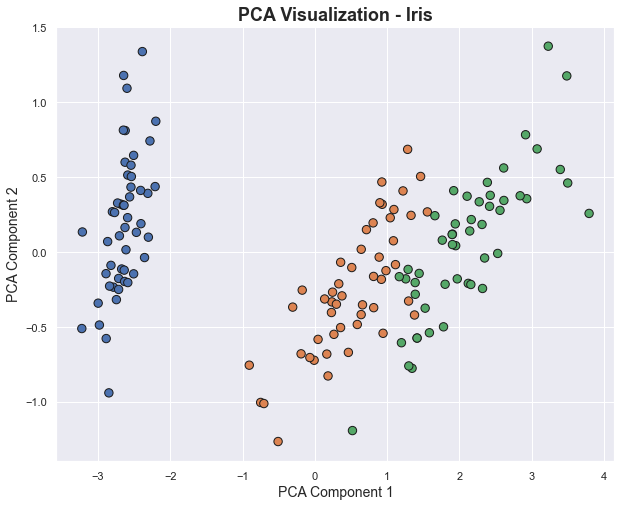

In [75]:

visualize_PCA(iris.data, iris.target, 'Iris')


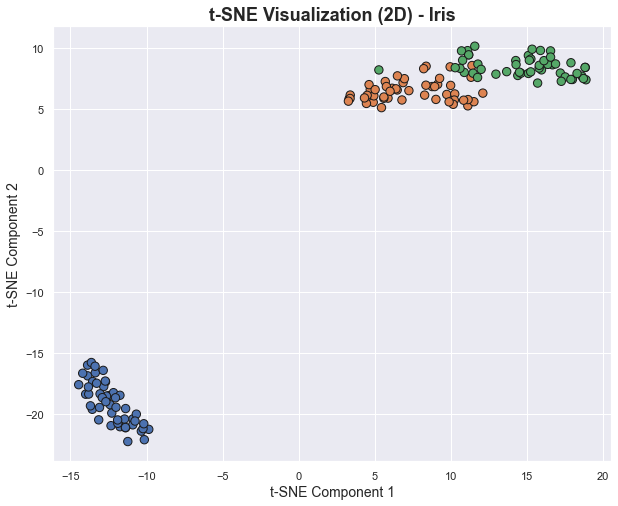

In [32]:

visualize_tsne(iris.data, iris.target, n_components=2, dataset_name="Iris")


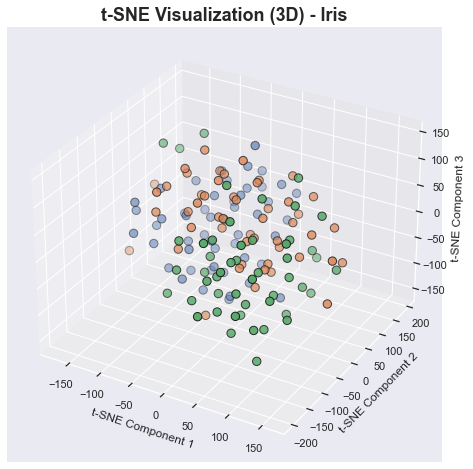

In [44]:

visualize_tsne(iris.data, iris.target, n_components=3, dataset_name="Iris")


## **Visualizing Wine Dataset**

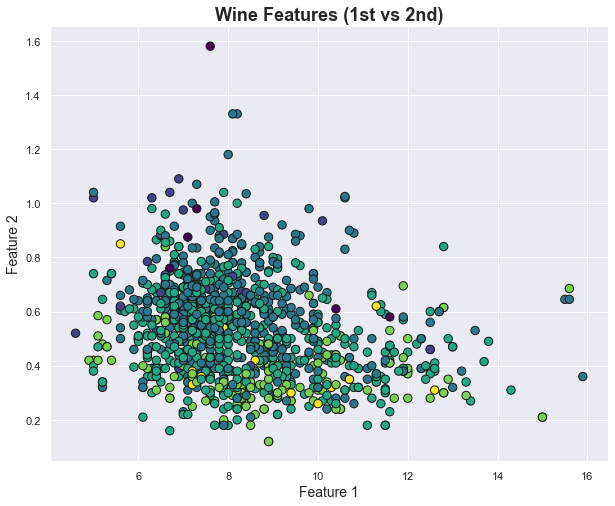

In [68]:
wine = datasets.load_wine()
wine_df = pd.read_csv('./WineQT.csv')
X_wine = wine_df.iloc[:, :-2]
Y_wine = wine_df['quality']

plt.figure(figsize=(10, 8))
plt.scatter(X_wine.iloc[:, 0], X_wine.iloc[:, 1], c=Y_wine, cmap='viridis', edgecolor='k', s=70)
plt.title(f'Wine Features (1st vs 2nd)', fontsize=18, fontweight='bold')
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

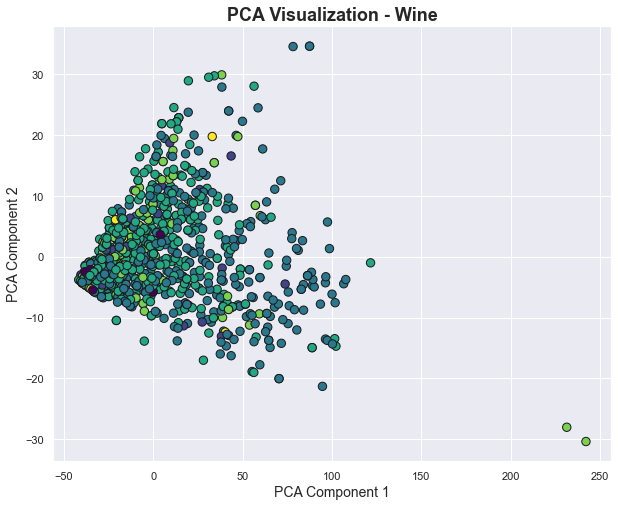

In [76]:

visualize_PCA(X_wine, Y_wine, 'Wine')


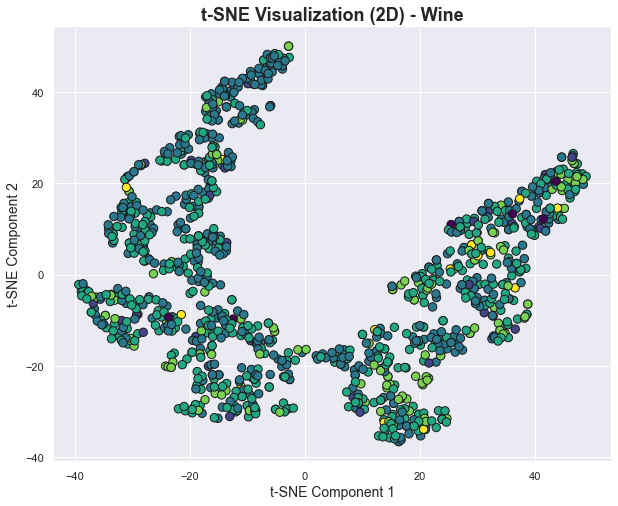

In [65]:

visualize_tsne(X_wine, Y_wine, n_components=2, dataset_name="Wine")


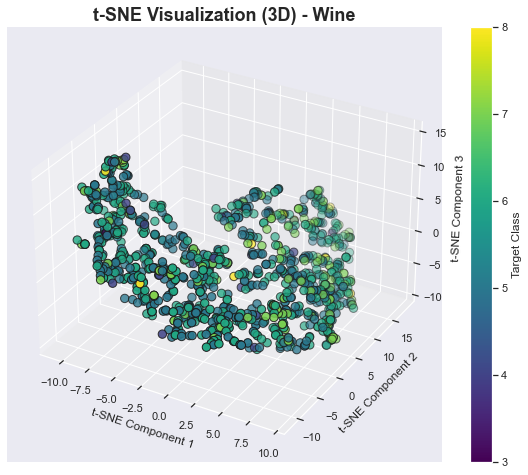

In [47]:

visualize_tsne(X_wine, Y_wine, n_components=3, dataset_name="Wine")
